# Generative Adversarial Network (GAN) In Depth

**Contents**

- Introduction
- GAN
- Deep Convolutional GAN
- Conditional And Unconditional GAN
- Style GAN
- Cycle GAN
- Evaluation Metrics
- Pros And Cons

### Introduction

- Deep learning models can be broadly classified into generative and discriminative models.

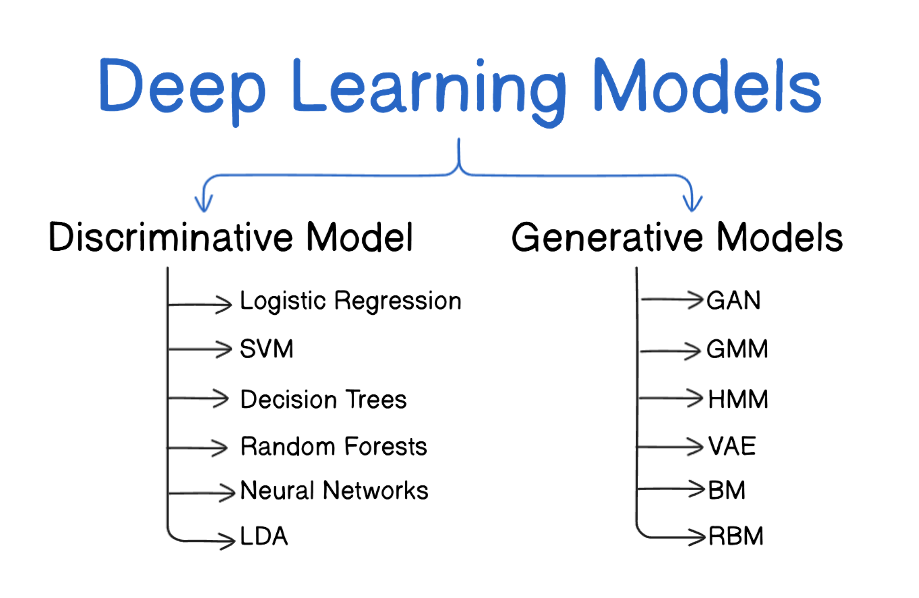

### Discriminative Models

Discriminative models learn the decision boundary between different classes. They focus on modeling the conditional probability P(y∣x) where y is the label and x is the input data. These models are used primarily for classification tasks.

- Draw boundaries in the data space
- X → Y
- P(Y | X)
1. **Logistic Regression**: A simple linear model used for binary classification tasks. It uses the logistic function to predict probabilities.
2. **Support Vector Machines (SVM)**: A classification method that finds the hyperplane which best separates different classes. It can be extended to non-linear classification using kernel functions.
3. **Decision Trees**: A model that splits the data into subsets based on the value of input features, creating a tree-like structure for decision-making.
4. **Random Forests**: An ensemble method that builds multiple decision trees and merges them to get a more accurate and stable prediction.
5. **Neural Networks**: Including Convolutional Neural Networks (CNNs) for image data, Recurrent Neural Networks (RNNs) for sequential data, and feedforward neural networks for various types of data.
6. **Linear Discriminant Analysis (LDA)**: A method used for dimensionality reduction while preserving as much of the class discriminatory information as possible.

### Generative Models

Generative models learn the distribution of the data itself. They model the joint probability P(x,y) and can generate new data samples that are similar to the training data.

- Try to model how data is placed throughout the space
- E, Y → X
- E: noise, Y:class, X: Features
1. **Gaussian Mixture Models (GMM)**: A probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters.
2. **Hidden Markov Models (HMM)**: A statistical model that represents systems that transition from one state to another with a certain probability, useful for time-series data.
3. **Variational Autoencoders (VAE)**: A type of autoencoder that uses variational methods to approximate the distribution of the data and generate new data points.
4. **Generative Adversarial Networks (GANs)**: Comprising two networks, a generator and a discriminator, that are trained together. The generator tries to create data that is indistinguishable from real data, while the discriminator tries to differentiate between real and generated data.
5. **Boltzmann Machines**: Stochastic neural networks that can learn the underlying probability distribution of a dataset.
6. **Restricted Boltzmann Machines (RBM)**: A simplified version of Boltzmann Machines with restrictions that make them easier to train.
7. **Autoregressive Models**: Models like PixelRNN and PixelCNN that generate data points sequentially, with each new data point conditioned on the previous ones.

### Key Differences

- **Objective**: Discriminative models aim to find the decision boundary between classes, while generative models aim to understand and replicate the underlying data distribution.
- **Probability Modeling**: Discriminative models estimate P(y∣x), while generative models estimate P(x,y) or P(x).
- **Use Cases**: Discriminative models are used for tasks like classification and regression, whereas generative models are used for tasks like image and text generation, anomaly detection, and semi-supervised learning.

### **GAN**

Generative Adversarial Networks (GANs) are a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in 2014. They consist of two neural networks, the generator and the discriminator, which are trained simultaneously by competing against each other. This adversarial process allows GANs to produce highly realistic synthetic data.

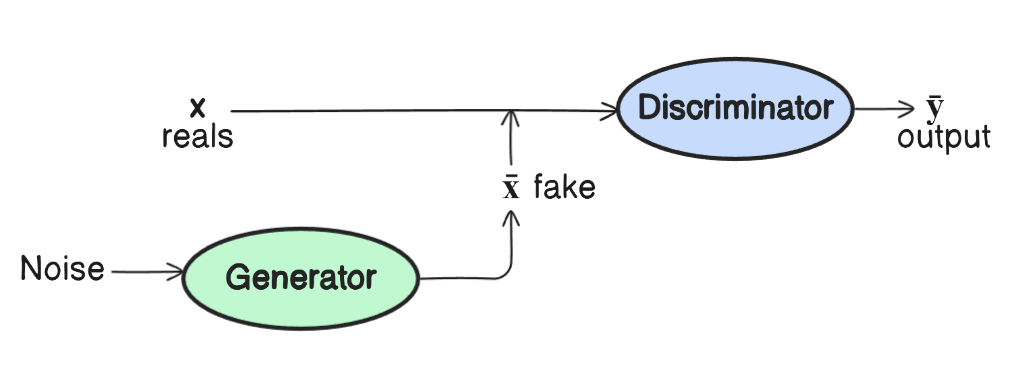

**Components:**

1. **Generator (G):**
    - Purpose: To generate fake data resembling the real data.
    - Function: Takes a random noise vector (latent space vector) as input and transforms it into synthetic data.
2. **Discriminator (D):**
    - Purpose: To distinguish between real and fake data.
    - Function: Takes an input (either real data or synthetic data from the generator) and outputs a probability indicating whether the input is real or fake.

**Training Process:**

1. **Adversarial Training:**
    - The generator creates fake data to fool the discriminator.
    - The discriminator learns to better distinguish between real and fake data.
    - The training alternates between updating the discriminator to improve its classification accuracy and updating the generator to produce more realistic data.
2. **Loss Functions:**
    - **Discriminator Loss:** Measures how well the discriminator can distinguish real from fake data.
    - **Generator Loss:** Measures how well the generator can fool the discriminator.

**Variants of GANs:**

1. **Conditional GANs (cGANs):** GANs conditioned on some extra information, such as class labels.
2. **CycleGAN:** Enables image-to-image translation without requiring paired examples.
3. **DCGAN:** Uses deep convolutional networks for both the generator and the discriminator.
4. **Wasserstein GAN (WGAN):** Uses a different loss function to improve training stability and address issues like mode collapse.

### DCGAN Architecture

DCGANs apply specific architectural guidelines to standard GANs, particularly using convolutional layers to improve the generation of high-quality images.

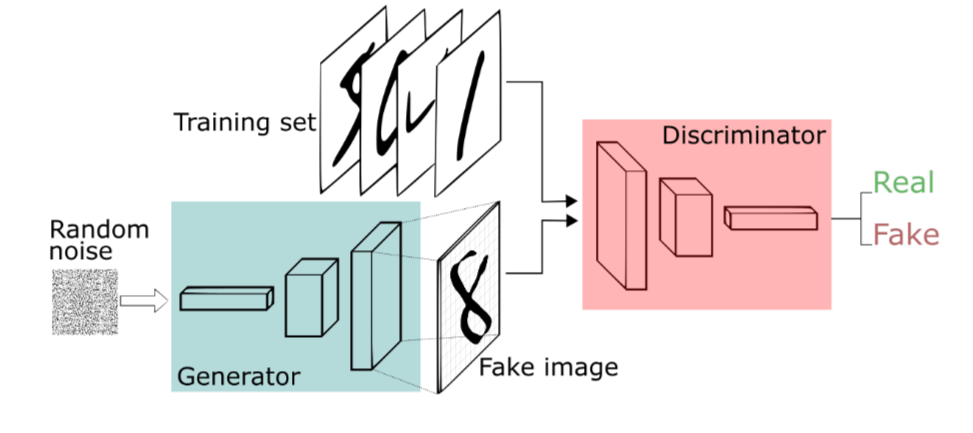

**key components**

1. **Convolutional Layers**: Replace fully connected layers with convolutional layers in both the generator and discriminator to leverage spatial hierarchies and local dependencies in images.
2. **Transposed Convolutional Layers**: Use transposed (or fractionally-strided) convolutions in the generator to upsample the input noise vector z into larger images.
3. **Batch Normalization**: Apply batch normalization in both the generator and discriminator to stabilize training and help with gradient flow.
4. **Leaky ReLU Activation**: Use Leaky ReLU activation in the discriminator, except for the output layer, where a sigmoid activation is used to output probabilities. The generator typically uses ReLU activations, except for the output layer, which uses a Tanh activation to produce normalized image pixel values.
5. **No Pooling Layers**: Avoid using pooling layers. Instead, use strided convolutions in the discriminator and fractional-strided convolutions in the generator to achieve downsampling and upsampling, respectively.

### DCGAN Generator Network

The generator network in a DCGAN consists of a series of transposed convolutional layers, with each layer progressively increasing the spatial dimensions of the input noise vector while decreasing the number of feature maps. The final layer outputs a synthetic image with the same dimensions as the real images in the dataset.

Example of a generator architecture:

```yaml
Input: Random noise vector z
Fully connected layer, reshaped to (4x4x1024)
Transposed Convolution: 4x4, stride 2, padding 1, output size (8x8x512)
BatchNorm + ReLU
Transposed Convolution: 4x4, stride 2, padding 1, output size (16x16x256)
BatchNorm + ReLU
Transposed Convolution: 4x4, stride 2, padding 1, output size (32x32x128)
BatchNorm + ReLU
Transposed Convolution: 4x4, stride 2, padding 1, output size (64x64x3)
Tanh Activation
Output: Synthetic image of size 64x64x3
```

### DCGAN Discriminator Network

The discriminator network in a DCGAN consists of a series of convolutional layers, with each layer progressively decreasing the spatial dimensions of the input image while increasing the number of feature maps. The final layer outputs a single value representing the probability that the input image is real.

Example of a discriminator architecture:

```vbnet
Input: Image of size 64x64x3
Convolution: 4x4, stride 2, padding 1, output size (32x32x128)
Leaky ReLU
Convolution: 4x4, stride 2, padding 1, output size (16x16x256)
BatchNorm + Leaky ReLU
Convolution: 4x4, stride 2, padding 1, output size (8x8x512)
BatchNorm + Leaky ReLU
Convolution: 4x4, stride 2, padding 1, output size (4x4x1024)
BatchNorm + Leaky ReLU
Fully connected layer
Sigmoid Activation
Output: Probability that the input image is real
```

### Training DCGANs

Training DCGANs involves alternately updating the discriminator and the generator. The discriminator is updated to maximize the likelihood of correctly classifying real and fake images, while the generator is updated to minimize the likelihood of the discriminator correctly classifying its generated images.

**Training Steps:**

1. Sample a batch of real images from the training dataset.
2. Sample a batch of random noise vectors.
3. Generate fake images using the generator.
4. Train the discriminator on the combined batch of real and fake images.
5. Sample another batch of random noise vectors.
6. Train the generator using the gradients from the discriminator’s classification of fake images.

**Advantages:**

- Improved image generation quality due to the use of convolutional layers.
- Stability in training provided by architectural guidelines like batch normalization and avoiding pooling layers.
- Ability to learn unsupervised representations useful for downstream tasks.

**Challenges:**

- Training can be unstable and sensitive to hyperparameters.
- Mode collapse, where the generator produces a limited variety of images.
- Difficulty in generating high-resolution images.

### Unconditional GANs

Unconditional GANs generate data samples without any conditioning information. The generator network receives only a random noise vector as input and produces data that should mimic the real data distribution. The discriminator network tries to distinguish between real and fake data samples.

**Architecture:**

1. **Generator (G):** Takes a random noise vector z and generates synthetic data.
2. **Discriminator (D):** Takes either real data or synthetic data from the generator and classifies it as real or fake.

**Training Process:**

1. Sample noise vectors from a predefined distribution (e.g., normal distribution).
2. Generate synthetic data from the noise vectors using the generator.
3. Train the discriminator with both real and generated data.
4. Update the generator to improve its ability to produce data that the discriminator misclassifies as real.

**Example:**
Unconditional GANs can generate random images from a dataset like MNIST (handwritten digits) without any labels or additional context.

### Conditional GANs (cGANs)

Conditional GANs generate data samples conditioned on some additional information or labels. The generator and discriminator both receive extra information (e.g., class labels, text descriptions) along with the noise vector and data samples, respectively. This allows for more controlled generation of data.

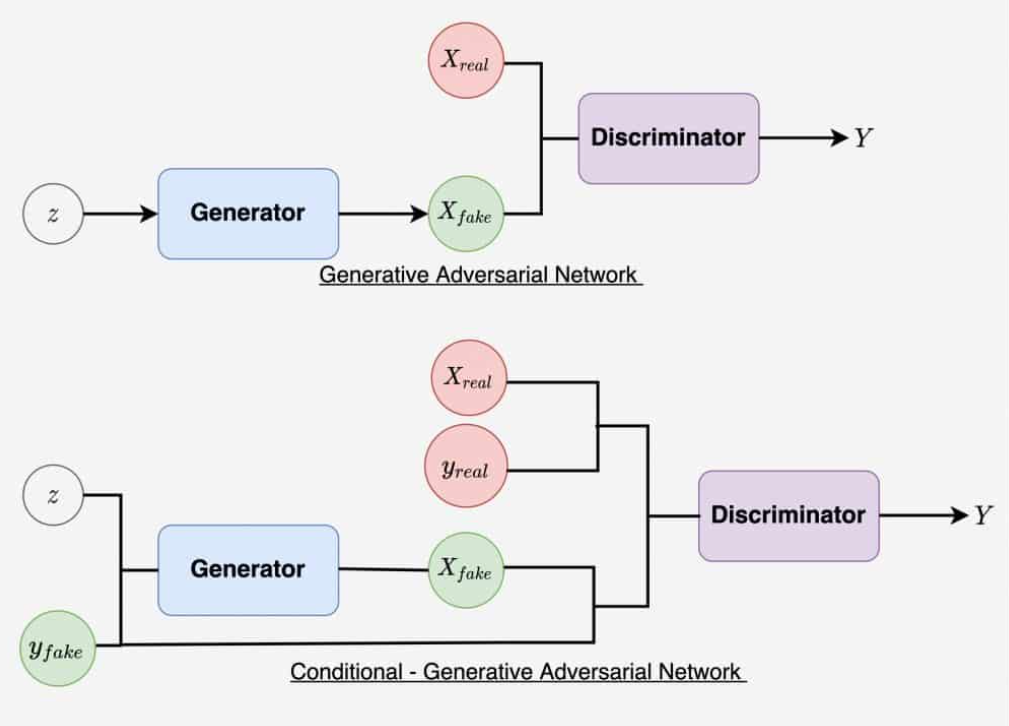

**Architecture:**

1. **Generator (G):** Takes a random noise vector z and a condition vector y (e.g., class labels) to generate synthetic data corresponding to the condition.
2. **Discriminator (D):** Takes both the condition vector y and either real or synthetic data and classifies the pair as real or fake.

**Training Process:**

1. Sample noise vectors and condition vectors from predefined distributions.
2. Generate synthetic data conditioned on the condition vectors using the generator.
3. Train the discriminator with pairs of condition vectors and real or generated data.
4. Update the generator to improve its ability to produce data that matches the condition vectors and fools the discriminator.

**Example:**
Conditional GANs can generate specific types of images, such as handwritten digits labeled "5" from the MNIST dataset or specific classes of images from the CIFAR-10 dataset.

### Differences Between Unconditional and Conditional GANs

1. **Input to Generator:**
    - **Unconditional GAN:** Random noise vector z.
    - **Conditional GAN:** Random noise vector z and condition vector y.
2. **Input to Discriminator:**
    - **Unconditional GAN:** Data sample (either real or generated).
    - **Conditional GAN:** Data sample and condition vector y.
3. **Output Control:**
    - **Unconditional GAN:** Generates data without control over the specific characteristics of the output.
    - **Conditional GAN:** Generates data with control over specific characteristics based on the condition vector y.

### Implementation Details

**Unconditional GAN Example (Pseudocode):**

```python
# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # Define layers

    def forward(self, z):
        # Forward pass
        return generated_data

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # Define layers

    def forward(self, x):
        # Forward pass
        return validity

# Training loop
for epoch in range(num_epochs):
    for real_data in dataloader:
        # Train Discriminator
        noise = torch.randn(batch_size, noise_dim)
        fake_data = generator(noise)
        d_loss = compute_d_loss(discriminator, real_data, fake_data)
        d_optimizer.step()

        # Train Generator
        noise = torch.randn(batch_size, noise_dim)
        fake_data = generator(noise)
        g_loss = compute_g_loss(discriminator, fake_data)
        g_optimizer.step()
```

**Conditional GAN Example (Pseudocode):**

```python
# Generator
class ConditionalGenerator(nn.Module):
    def __init__(self):
        super(ConditionalGenerator, self).__init__()
        # Define layers

    def forward(self, z, y):
        # Forward pass with condition
        return generated_data

# Discriminator
class ConditionalDiscriminator(nn.Module):
    def __init__(self):
        super(ConditionalDiscriminator, self).__init__()
        # Define layers

    def forward(self, x, y):
        # Forward pass with condition
        return validity

# Training loop
for epoch in range(num_epochs):
    for real_data, labels in dataloader:
        # Train Discriminator
        noise = torch.randn(batch_size, noise_dim)
        fake_data = generator(noise, labels)
        d_loss = compute_d_loss(discriminator, real_data, fake_data, labels)
        d_optimizer.step()

        # Train Generator
        noise = torch.randn(batch_size, noise_dim)
        fake_data = generator(noise, labels)
        g_loss = compute_g_loss(discriminator, fake_data, labels)
        g_optimizer.step()
```

### StyleGAN

- StyleGAN is an advanced type of Generative Adversarial Network (GAN) introduced by NVIDIA researchers in a series of papers, notably "A Style-Based Generator Architecture for Generative Adversarial Networks" (2018) and its subsequent improvements.
- StyleGAN introduces a style-based generator that separates the high-level attributes of an image (such as pose and identity) from stochastic variations (such as freckles and hair). This separation allows for more intuitive and fine-grained control over the generated images.

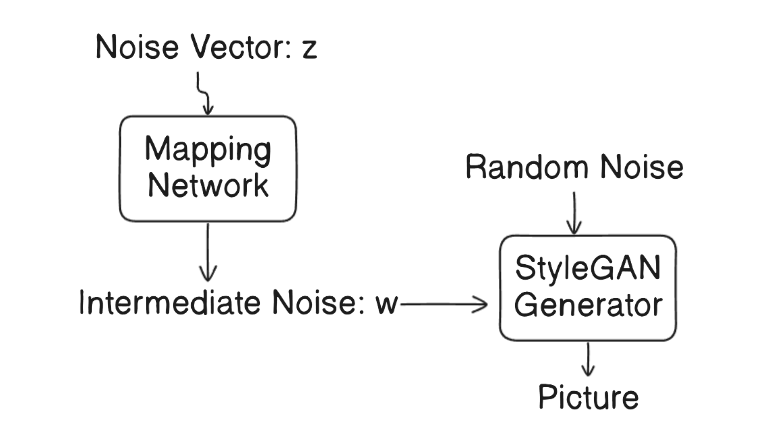

### Main Components

1. **Progressive Growing:** Similar to Progressive GANs, StyleGANs are trained using a progressive growing technique, where the resolution of the generated images gradually increases during training. This approach helps stabilize training and allows the model to learn finer details as it progresses.
2. **Noise Mapping Network:** The noise mapping network in StyleGAN, through the mapping network and the use of the W space, introduces a layer of control that allows for the disentanglement of different attributes in the generated images. This separation of style control at various layers of the generator enables StyleGAN to produce high-quality images with precise control over their appearance, making it a powerful tool for various applications, from creative content generation to facial attribute editing.
3. **Adaptive Instance Normalization (AdaIN):** Modulates the feature maps at each convolutional layer using the style vectors derived from w. This allows different styles to be applied at different layers, controlling various aspects of the image generation process.

- **Mapping Network:** A series of fully connected layers that transform the initial latent code z (sampled from a Gaussian distribution) into an intermediate latent space w.

### StyleGAN Architecture

The StyleGAN generator consists of several key components:

1. **Mapping Network:**
    - Transforms the latent code z into w through a series of fully connected layers.
    - The intermediate latent space W enables more control over the styles applied at different layers.
2. **Synthesis Network:**
    - Uses AdaIN to apply styles to the feature maps at each convolutional layer.
    - Incorporates stochastic noise inputs to add fine details to the images.
    - Progressive growing is used to incrementally increase the resolution of generated images.

### Implementation Example (Pseudocode)

```python
# Mapping Network
class MappingNetwork(nn.Module):
    def __init__(self, z_dim, w_dim):
        super(MappingNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(z_dim, w_dim),
            nn.ReLU(),
            nn.Linear(w_dim, w_dim),
            nn.ReLU(),
            # More layers as needed
        )

    def forward(self, z):
        w = self.fc(z)
        return w

# Synthesis Network
class SynthesisNetwork(nn.Module):
    def __init__(self, w_dim, img_channels):
        super(SynthesisNetwork, self).__init__()
        self.conv1 = nn.Conv2d(w_dim, 512, 3, padding=1)
        self.adain1 = AdaIN()
        self.conv2 = nn.Conv2d(512, 256, 3, padding=1)
        self.adain2 = AdaIN()
        # More layers as needed

    def forward(self, w):
        x = self.conv1(w)
        x = self.adain1(x, w)
        x = self.conv2(x)
        x = self.adain2(x, w)
        # More layers as needed
        return x

# StyleGAN Model
class StyleGAN(nn.Module):
    def __init__(self, z_dim, w_dim, img_channels):
        super(StyleGAN, self).__init__()
        self.mapping = MappingNetwork(z_dim, w_dim)
        self.synthesis = SynthesisNetwork(w_dim, img_channels)

    def forward(self, z):
        w = self.mapping(z)
        img = self.synthesis(w)
        return img

# Training loop (simplified)
for epoch in range(num_epochs):
    for z in dataloader:
        optimizer.zero_grad()
        generated_images = stylegan(z)
        loss = compute_loss(generated_images, real_images)
        loss.backward()
        optimizer.step()
```

### CycleGAN

CycleGAN (Cycle-Consistent Generative Adversarial Network) is a type of GAN designed for unpaired image-to-image translation. Unlike other models that require paired training data, CycleGAN can learn to translate images from one domain to another using unpaired datasets. This ability is particularly useful when paired datasets are unavailable or difficult to obtain.

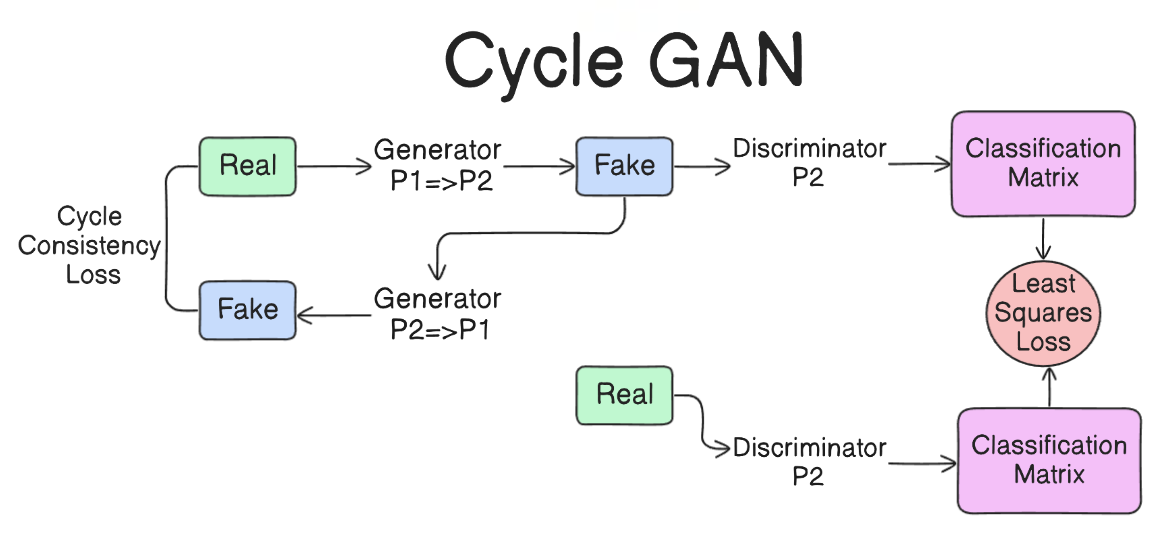

### Key Concepts

### 1. Unpaired Image-to-Image Translation

Traditional image-to-image translation methods require paired datasets, where each image in one domain has a corresponding image in another domain. CycleGAN eliminates this requirement by using unpaired datasets, learning the translation between domains solely based on the images within each domain.

### 2. Cycle Consistency

The core idea behind CycleGAN is cycle consistency. This concept ensures that an image translated from domain X to domain Y and then back to domain X should be the same as the original image. This cycle consistency loss helps the model learn mappings that are more accurate and preserve the content of the images.

### Architecture

CycleGAN consists of two pairs of generator and discriminator networks:

1. **Generators (G and F):**
    - G: X→Y: Translates images from domain X to domain Y.
    - F: Y→X: Translates images from domain Y to domain X.
2. **Discriminators (D_X and D_Y):**
    - D_X: Distinguishes between real images from domain X and fake images generated by F from domain Y.
    - D_Y: Distinguishes between real images from domain Y and fake images generated by G from domain X.

### Loss Functions

CycleGAN uses three types of losses to train the networks:

1. **Adversarial Loss:**
    - Ensures that the generated images are indistinguishable from real images in the target domain.
2. **Cycle Consistency Loss:**
    - Ensures that an image can be translated to the other domain and back without significant changes.
3. **Identity Loss:**
    - Ensures that the generator doesn't alter images that are already in the target domain.

### Implementation Example (Pseudocode)

```python
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # Define the generator network architecture

    def forward(self, x):
        # Forward pass
        return output

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # Define the discriminator network architecture

    def forward(self, x):
        # Forward pass
        return output

# Instantiate the networks
G = Generator()  # X -> Y
F = Generator()  # Y -> X
D_X = Discriminator()  # Discriminator for domain X
D_Y = Discriminator()  # Discriminator for domain Y

# Optimizers
optimizer_G = torch.optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_F = torch.optim.Adam(F.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D_X = torch.optim.Adam(D_X.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D_Y = torch.optim.Adam(D_Y.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop (simplified)
for epoch in range(num_epochs):
    for real_X, real_Y in dataloader:
        # Train Generators G and F
        optimizer_G.zero_grad()
        optimizer_F.zero_grad()
        fake_Y = G(real_X)
        recon_X = F(fake_Y)
        fake_X = F(real_Y)
        recon_Y = G(fake_X)

        # Calculate cycle consistency loss
        loss_cyc = cycle_consistency_loss(real_X, recon_X, real_Y, recon_Y)

        # Calculate adversarial loss
        loss_GAN_G = adversarial_loss(D_Y, fake_Y)
        loss_GAN_F = adversarial_loss(D_X, fake_X)

        # Calculate identity loss
        loss_id = identity_loss(G, F, real_X, real_Y)

        # Total generator loss
        loss_G_F = loss_GAN_G + loss_GAN_F + lambda_cyc * loss_cyc + gamma_id * loss_id
        loss_G_F.backward()
        optimizer_G.step()
        optimizer_F.step()

        # Train Discriminators D_X and D_Y
        optimizer_D_X.zero_grad()
        optimizer_D_Y.zero_grad()
        loss_D_X = discriminator_loss(D_X, real_X, fake_X.detach())
        loss_D_Y = discriminator_loss(D_Y, real_Y, fake_Y.detach())
        loss_D_X.backward()
        loss_D_Y.backward()
        optimizer_D_X.step()
        optimizer_D_Y.step()
```

### GAN Evaluation

Evaluating the performance of GANs (Generative Adversarial Networks) is crucial to understanding how well the generator and discriminator networks perform. Various metrics are used to assess the quality and diversity of the generated images, as well as the convergence of the GAN training process.

### 1. Inception Score (IS)

**Description:**
The Inception Score evaluates the quality and diversity of generated images by using a pre-trained Inception v3 network. It considers both the confidence of the classifier in its predictions and the diversity of the generated samples.

**Formula:**

$$
IS(G)=exp(E_{x∼pG}[D_{KL}(p(y∣x)∥p(y))])
$$

- where p(y∣x) is the conditional label distribution predicted by the Inception model for a generated image x, and p(y) is the marginal distribution.

**Advantages:**

- Easy to compute.
- Reflects both quality and diversity of images.

**Disadvantages:**

- Sensitive to the choice of the pre-trained model.
- May not always correlate well with human judgment.

### 2. Frechet Inception Distance (FID)

**Description:**
The FID score measures the distance between the feature distributions of real and generated images. It uses the activations of a pre-trained Inception v3 model's intermediate layers to calculate the mean and covariance of the features.

**Formula:**

$$
FID=∥μ_r−μ_g∥2+T_r(Σ_r+Σ_g−2(Σ_rΣ_g)^{1/2})
$$

- where (μr,Σr) and (μg,Σg) are the mean and covariance of the features of real and generated images, respectively.

**Advantages:**

- Considers both the quality and diversity of images.
- More robust and correlates better with human judgment than IS.

**Disadvantages:**

- Computationally expensive.
- Sensitive to the choice of pre-trained model and the number of samples.

### 3. Precision and Recall for Distributions

**Description:**
Precision and recall metrics adapted for generative models measure the quality and diversity of the generated samples. Precision evaluates how much of the generated data falls within the real data distribution, while recall measures how well the real data distribution is covered by the generated data.

**Advantages:**

- Provides a clear distinction between quality (precision) and diversity (recall).
- More informative when used together.

**Disadvantages:**

- Computationally intensive.
- Requires careful tuning of thresholds.

### Pros of GANs

1. **High-Quality Data Generation:**
    - GANs are capable of generating high-resolution and highly realistic images, videos, and other types of data. The quality of the generated data is often superior to that produced by other generative models.
2. **Unsupervised Learning:**
    - GANs can learn to generate data without requiring labeled training data. This is particularly useful in situations where labeled data is scarce or expensive to obtain.
3. **Flexibility:**
    - GANs can be applied to a wide range of tasks beyond image generation, including image-to-image translation, text-to-image synthesis, super-resolution, inpainting, and more.
4. **Creative Applications:**
    - GANs have been used in various creative fields such as art, music, and design, enabling the creation of novel and innovative works that were previously difficult or impossible to produce.
5. **Data Augmentation:**
    - GANs can generate synthetic data to augment existing datasets, which can be beneficial for training machine learning models, especially in scenarios where real data is limited.
6. **Learning Features:**
    - GANs can learn complex data distributions and capture intricate features in the data, which can be useful for downstream tasks such as feature extraction and representation learning.

### Cons of GANs

1. **Training Instability:**
    - Training GANs is notoriously difficult and unstable. The process often suffers from issues such as mode collapse, where the generator produces a limited variety of outputs, and vanishing gradients, where the discriminator becomes too strong, hindering the generator's learning.
2. **Resource Intensive:**
    - GANs require significant computational resources for training, including high-performance GPUs and substantial amounts of memory. The training process can be very slow, especially for large and complex models.
3. **Sensitive to Hyperparameters:**
    - The performance of GANs is highly sensitive to the choice of hyperparameters, such as learning rates, network architectures, and batch sizes. Tuning these parameters to achieve optimal performance can be challenging and time-consuming.
4. **Evaluation Challenges:**
    - Evaluating the performance of GANs is difficult due to the lack of standardized and universally accepted metrics. Metrics like Inception Score (IS) and Frechet Inception Distance (FID) provide some insights but have limitations and can be computationally expensive.
5. **Mode Collapse:**
    - Mode collapse is a common problem in GANs where the generator produces a narrow range of outputs, failing to capture the diversity of the data distribution. This can lead to poor generalization and limited applicability.
6. **Susceptibility to Adversarial Attacks:**
    - GANs, like other neural networks, can be vulnerable to adversarial attacks, where small perturbations to the input data can significantly impact the output, potentially leading to misleading or harmful results.
7. **Ethical and Legal Concerns:**
    - The ability of GANs to generate highly realistic fake data raises ethical and legal issues, particularly in the context of deepfakes and synthetic media. These technologies can be misused for malicious purposes, such as creating fake identities or spreading misinformation.
8. **Overfitting:**
    - GANs can sometimes overfit to the training data, especially when the training dataset is small. This can result in generated data that does not generalize well to unseen samples.